In [15]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_functions
from pathos.multiprocessing import Pool

### Use piecewise to recreate the original sequence

In [16]:
# Load sequence from text file
def load_best_sequence(filepath="best_sequence_same_length.txt"):
    with open(filepath, "r") as f:
        lines = f.readlines()
    sequence = [eval(line.strip()) for line in lines]  # [[axis, delta_n], ...]
    return sequence

In [17]:
sequence = load_best_sequence('sequences/original.txt')

In [18]:
ground_state_counts = []
nums_survive = []
scores = []
n_bars = []

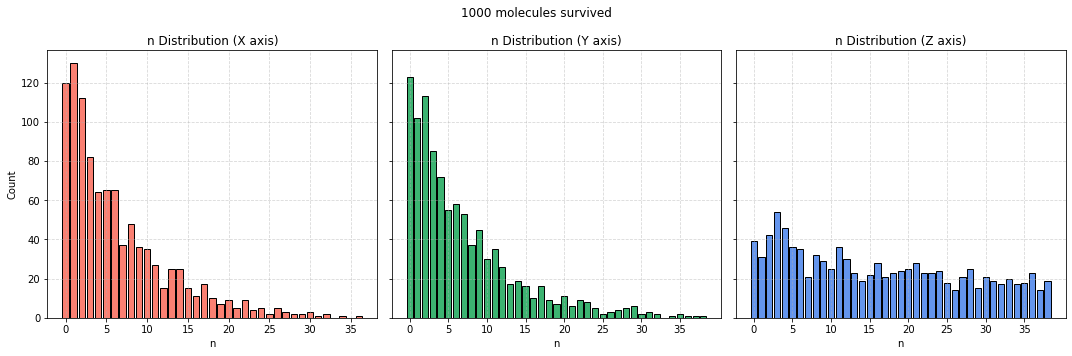

In [5]:
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

In [6]:
n_bar, num_survive, ground_state_count, score = RSC_functions.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
scores.append(score)
nums_survive.append(num_survive)
n_bars.append(n_bar)

Applying pulses: 100%|██████████| 280/280 [00:25<00:00, 10.81it/s]


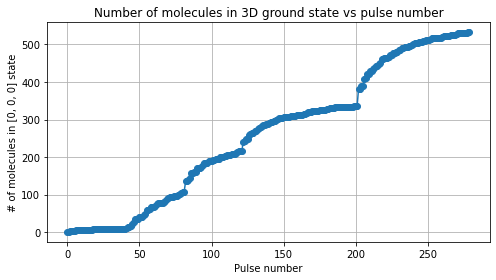

In [7]:
plt.figure(figsize=(7, 4))
plt.plot(range(len(ground_state_count)), ground_state_count, marker='o')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.show()

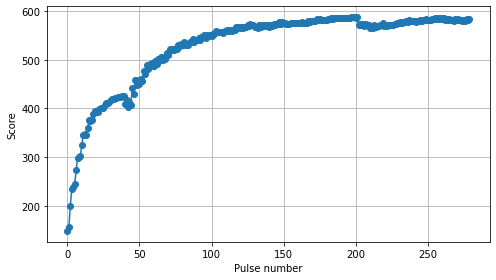

In [8]:
plt.figure(figsize=(7, 4))
plt.plot(range(len(score)), score, marker='o')
plt.xlabel("Pulse number")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()

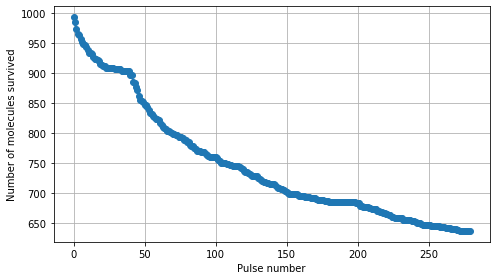

In [9]:
plt.figure(figsize=(7, 4))
plt.plot(range(len(num_survive)), num_survive, marker='o')
plt.xlabel("Pulse number")
plt.ylabel("Number of molecules survived")
plt.grid(True)
plt.tight_layout()
plt.show()

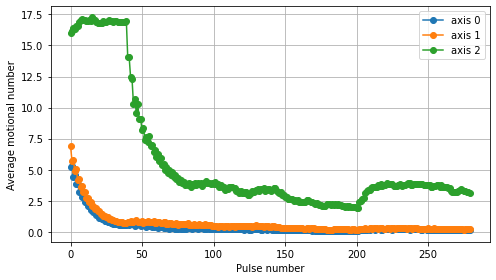

In [10]:
plt.figure(figsize=(7, 4))
for i in [0,1,2]:
    plt.plot(range(len(n_bar)), np.array(n_bar)[:,i], marker='o', label=f'axis {i}')
plt.xlabel("Pulse number")
plt.ylabel("Average motional number")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

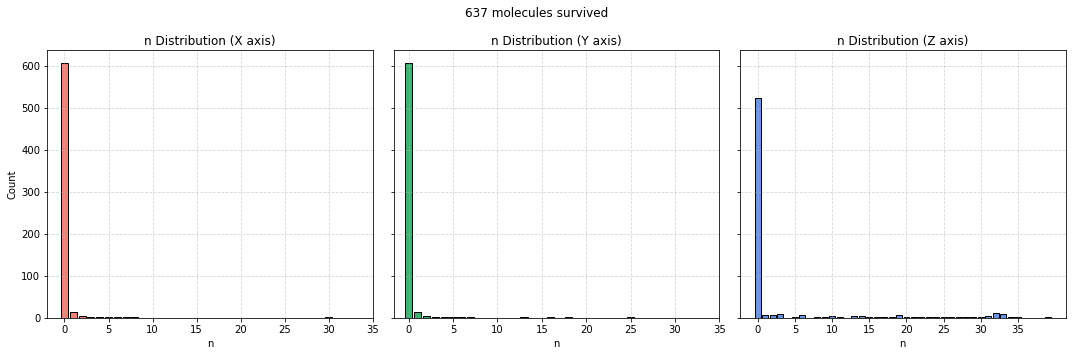

In [11]:
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

### Optimize with Genetic Algorithm

In [12]:
op_seq = [[0, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[1, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[2, -5, 10.471975511965978],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[2, -5, 10.471975511965978],
[0, -2, 10.47197551196598],
[0, -1, 3.4522996193294437],
[1, -2, 10.47197551196598],
[2, -5, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[1, -1, 3.4522996193294437],
[2, -5, 10.471975511965978],
[0, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[1, -2, 10.47197551196598],
[2, -5, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[1, -1, 3.4522996193294437],
[2, -5, 10.471975511965978],
[0, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[1, -2, 10.47197551196598],
[2, -5, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[1, -1, 3.4522996193294437],
[2, -5, 10.471975511965978],
[0, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[1, -2, 10.47197551196598],
[2, -5, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[1, -1, 3.4522996193294437],
[2, -5, 10.471975511965978],
[0, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[1, -2, 10.47197551196598],
[2, -5, 10.471975511965978],
[2, -3, 20.943951023931955],
[2, -4, 10.471975511965978],
[1, -1, 3.4522996193294437],
[2, -1, 20.943951023931955],
[0, -2, 10.47197551196598],
[2, -3, 20.943951023931955],
[1, -2, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -1, 3.4522996193294437],
[2, -3, 20.943951023931955],
[2, -5, 10.471975511965978],
[2, -4, 10.471975511965978],
[0, -3, 10.47197551196598],
[2, -2, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -3, 20.943951023931955],
[1, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[0, -2, 10.47197551196598],
[2, -3, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -3, 20.943951023931955],
[1, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[0, -2, 10.47197551196598],
[2, -3, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -5, 10.471975511965978],
[2, -4, 10.471975511965978],
[2, -3, 20.943951023931955],
[1, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[0, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[0, -1, 3.4522996193294437],
[2, -5, 10.471975511965978],
[1, -2, 10.47197551196598],
[1, -1, 3.4522996193294437],
[0, -1, 3.4522996193294437],
[0, -2, 10.47197551196598],
[0, -1, 3.4522996193294437],
[2, -1, 20.943951023931955],
[2, -1, 20.943951023931955],
[1, -3, 10.47197551196598],
[1, -1, 3.4522996193294437],
[0, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[2, -5, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -1, 20.943951023931955],
[0, -1, 3.4522996193294437],
[1, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[2, -4, 10.471975511965978],
[1, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[2, -4, 10.471975511965978],
[2, -1, 20.943951023931955],
[2, -1, 20.943951023931955],
[2, -2, 20.943951023931955],
[2, -3, 20.943951023931955],
[0, -3, 10.47197551196598],
[2, -3, 20.943951023931955],
[1, -2, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[0, -1, 3.4522996193294437],
[0, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -3, 10.47197551196598],
[0, -3, 10.47197551196598],
[0, -3, 10.47197551196598],
[1, -2, 10.47197551196598],
[1, -1, 3.4522996193294437],
[0, -1, 3.4522996193294437],
[1, -1, 3.4522996193294437],
[1, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -1, 20.943951023931955],
[1, -1, 3.4522996193294437],
[1, -1, 3.4522996193294437],
[2, -1, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[0, -1, 3.4522996193294437],
[0, -2, 10.47197551196598],
[2, -5, 10.471975511965978],
[2, -4, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[0, -1, 3.4522996193294437],
[1, -3, 10.47197551196598],
[0, -1, 3.4522996193294437],
[0, -2, 10.47197551196598],
[0, -3, 10.47197551196598],
[0, -1, 3.4522996193294437],
[1, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[2, -3, 20.943951023931955],
[2, -2, 20.943951023931955],
[1, -3, 10.47197551196598],
[1, -3, 10.47197551196598],
[2, -1, 20.943951023931955],
[0, -3, 10.47197551196598],
[1, -2, 10.47197551196598],
[0, -2, 10.47197551196598],
[1, -1, 3.4522996193294437],
[2, -2, 20.943951023931955],
[0, -2, 10.47197551196598],
[2, -3, 20.943951023931955],
[0, -3, 10.47197551196598],
[2, -5, 10.471975511965978],
[0, -1, 3.4522996193294437],
[0, -3, 10.47197551196598],
[2, -5, 10.471975511965978],
[0, -3, 10.47197551196598],
[2, -4, 10.471975511965978],
[1, -3, 10.47197551196598],
[0, -3, 10.47197551196598],
[2, -1, 20.943951023931955],
[1, -1, 3.4522996193294437],
[2, -5, 10.471975511965978],
[0, -1, 3.4522996193294437],
[0, -3, 10.47197551196598],
[2, -5, 10.471975511965978],
[2, -1, 20.943951023931955],
[2, -1, 20.943951023931955],
[1, -3, 10.47197551196598],
[2, -2, 20.943951023931955],
[0, -1, 3.4522996193294437],
[1, -2, 10.47197551196598],
[1, -1, 3.4522996193294437],
[2, -2, 20.943951023931955],
[1, -3, 10.47197551196598],
[2, -4, 10.471975511965978],
[0, -1, 3.4522996193294437],
[2, -2, 20.943951023931955],
[2, -1, 20.943951023931955],
[0, -2, 10.47197551196598],
[1, -1, 3.4522996193294437],
[0, -1, 3.4522996193294437],
[1, -3, 10.47197551196598],
[2, -1, 20.943951023931955],
[1, -1, 3.4522996193294437],
[2, -2, 20.943951023931955],
[0, -2, 10.47197551196598],
[2, -1, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -2, 20.943951023931955],
[0, -1, 3.4522996193294437],
[2, -1, 20.943951023931955],
[1, -1, 3.4522996193294437],
[2, -2, 20.943951023931955],
[0, -2, 10.47197551196598],
[2, -1, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -2, 20.943951023931955],
[0, -1, 3.4522996193294437],
[2, -1, 20.943951023931955],
[1, -1, 3.4522996193294437],
[0, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[2, -1, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -4, 10.471975511965978],
[0, -2, 10.47197551196598],
[1, -2, 10.47197551196598],
[1, -1, 3.4522996193294437],
[2, -2, 20.943951023931955],
[0, -2, 10.47197551196598],
[2, -1, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -2, 20.943951023931955],
[2, -3, 20.943951023931955],
[2, -1, 20.943951023931955],
[1, -1, 3.4522996193294437],
[2, -2, 20.943951023931955],
[0, -2, 10.47197551196598],
[2, -1, 20.943951023931955],
[1, -2, 10.47197551196598],
[1, -1, 3.4522996193294437],
[0, -1, 3.4522996193294437],
[2, -1, 20.943951023931955],
[1, -1, 3.4522996193294437],
[2, -2, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -1, 20.943951023931955],
[1, -2, 10.47197551196598],
[2, -2, 20.943951023931955],
[0, -1, 3.4522996193294437],
[2, -4, 10.471975511965978],
[1, -1, 3.4522996193294437]]

In [13]:
# Load sequence from text file
def load_best_sequence(filepath="best_sequence_1.txt"):
    with open(filepath, "r") as f:
        lines = f.readlines()
    sequence = [eval(line.strip()) for line in lines]  # [[axis, delta_n], ...]
    return sequence

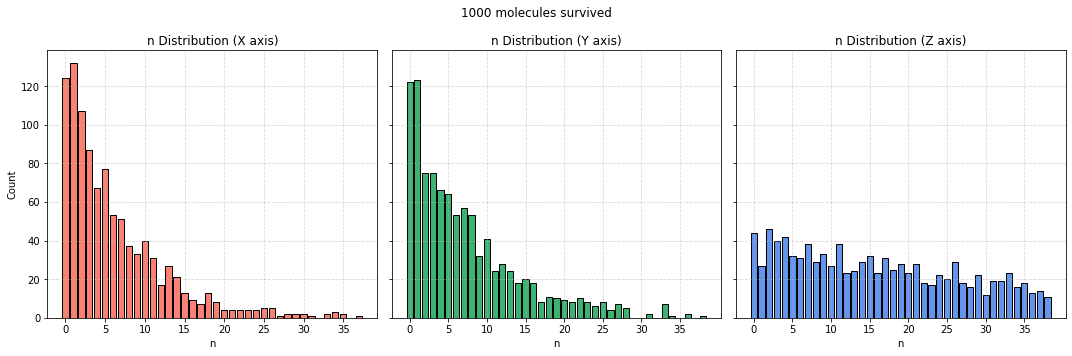

In [14]:
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

In [15]:
_, _, ground_state_count = RSC_functions.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)

Applying pulses: 100%|██████████| 280/280 [00:23<00:00, 11.75it/s]


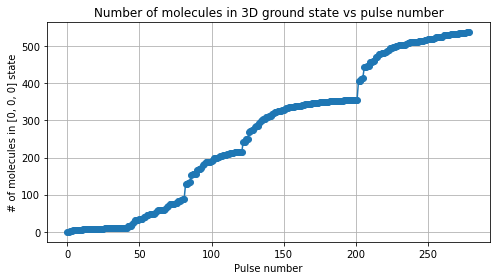

537


In [16]:
plt.figure(figsize=(7, 4))
plt.plot(range(len(ground_state_count)), ground_state_count, marker='o')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.show()
print(ground_state_count[-1])

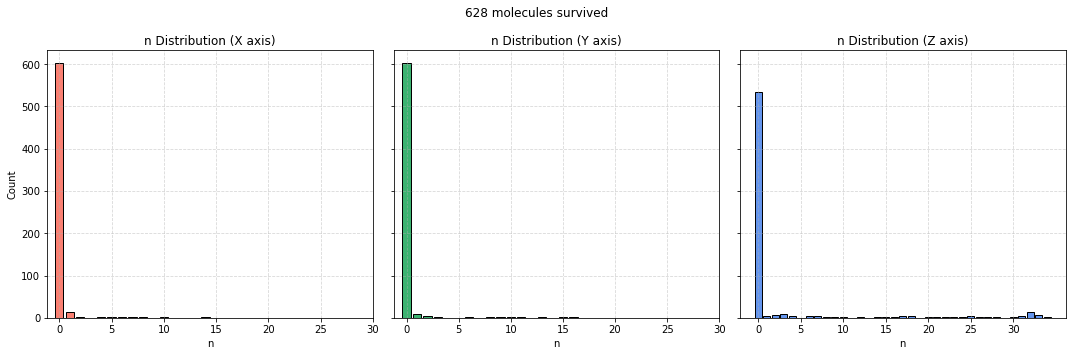

In [17]:
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

#### Optimize again

In [20]:
loaded_sequence = load_best_sequence('sequences/best_sequence_same_length.txt')
for i in loaded_sequence:
    print(i)

[0, -3, 10.47197551196598]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[0, -3, 10.47197551196598]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[0, -3, 10.47197551196598]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[0, -3, 10.47197551196598]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[0, -3, 10.47197551196598]
[2, -1, 20.943951023931955]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[0, -3, 10.47197551196598]
[1, -3, 10.47197551196598]
[2, -3, 20.943951023931955]
[1, -2, 10.47197551196598]
[0, -3, 10.47197551196598]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[2, -5, 10.471975511965978]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[0, -3, 10.47197551196598]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[0, -3, 10.47197551196598

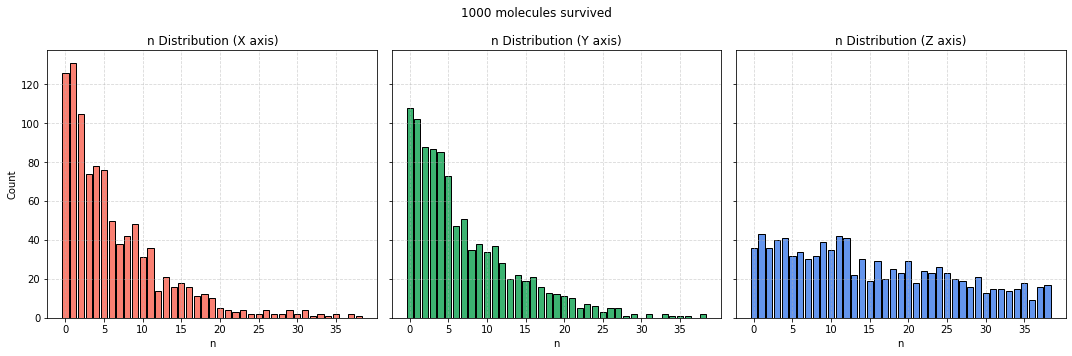

Applying pulses: 100%|██████████| 280/280 [00:26<00:00, 10.51it/s]


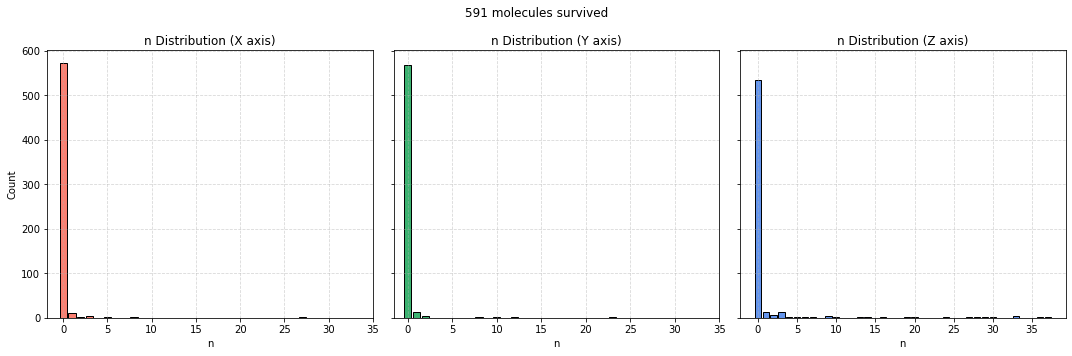

In [22]:
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)
n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(mol_list, loaded_sequence)
ground_state_counts.append(ground_state_count)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

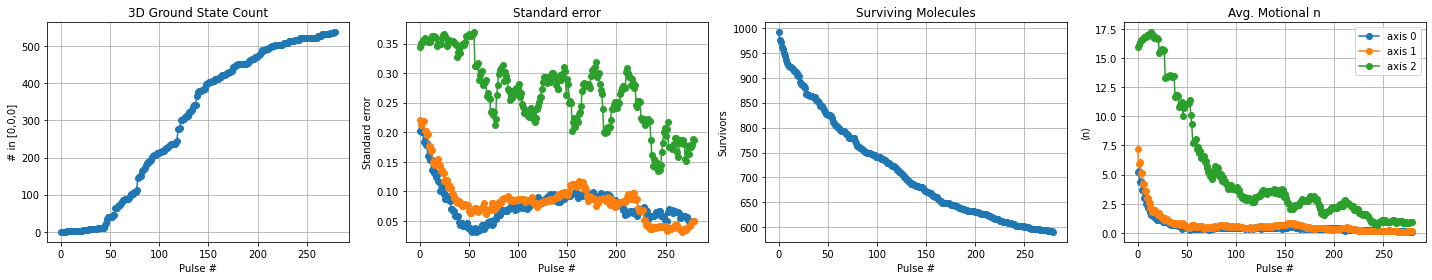

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Standard error
for i in [0, 1, 2]:
    axs[1].plot(range(len(sem)), np.array(sem)[:, i], marker='o', label=f'axis {i}')
axs[1].set_title("Standard error")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Standard error")
axs[1].grid(True)

# Plot 3: Molecules Survived
axs[2].plot(range(len(num_survive)), num_survive, marker='o')
axs[2].set_title("Surviving Molecules")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("Survivors")
axs[2].grid(True)

# Plot 4: Average n per axis
for i in [0, 1, 2]:
    axs[3].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[3].set_title("Avg. Motional n")
axs[3].set_xlabel("Pulse #")
axs[3].set_ylabel("⟨n⟩")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()


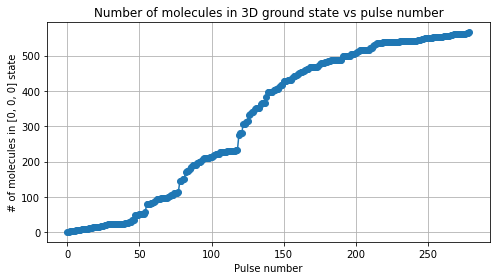

566


In [21]:
plt.figure(figsize=(7, 4))
plt.plot(range(len(ground_state_count)), ground_state_count, marker='o')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.show()
print(ground_state_count[-1])

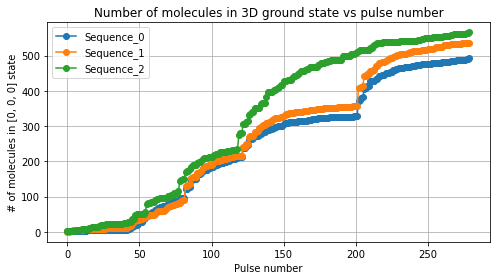

In [24]:
plt.figure(figsize=(7, 4))
for i, count in enumerate(ground_state_counts):
    plt.plot(range(len(count)), count, marker='o', label=f'Sequence_{i}')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Add higher $\Delta n$

In [35]:
loaded_sequence = load_best_sequence('sequences/best_sequence_same_length_2025-07-28_11-04-39.txt')
for i in loaded_sequence:
    print(i)

[0, -3, 10.47197551196598]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[0, -3, 10.47197551196598]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[1, -4, 14.499658401183662]
[1, -1, 3.4522996193294437]
[2, -5, 10.471975511965978]
[1, -4, 14.499658401183662]
[2, -4, 10.471975511965978]
[2, -3, 20.943951023931955]
[1, -2, 10.47197551196598]
[0, -1, 3.4522996193294437]
[2, -4, 10.471975511965978]
[1, -2, 10.47197551196598]
[2, -6, 15.707963267948962]
[2, -4, 10.471975511965978]
[0, -2, 10.47197551196598]
[0, -4, 14.499658401183662]
[1, -4, 14.499658401183662]
[2, -6, 15.707963267948962]
[1, -4, 14.499658401183662]
[1, -3, 10.47197551196598]
[0, -2, 10.47197551196598]
[2, -6, 15.707963267948962]
[1, -2, 10.47197551196598]
[1, -1, 3.4522996193294437]
[2, -4, 10.471975511965978]
[1, -2, 10.47197551196598]
[2, -2, 20.943951023931955]
[1, -4, 14.499658401183662]
[0, -2, 10.47197551196598]
[1, -2, 10.47197551196598]
[2, -6, 1

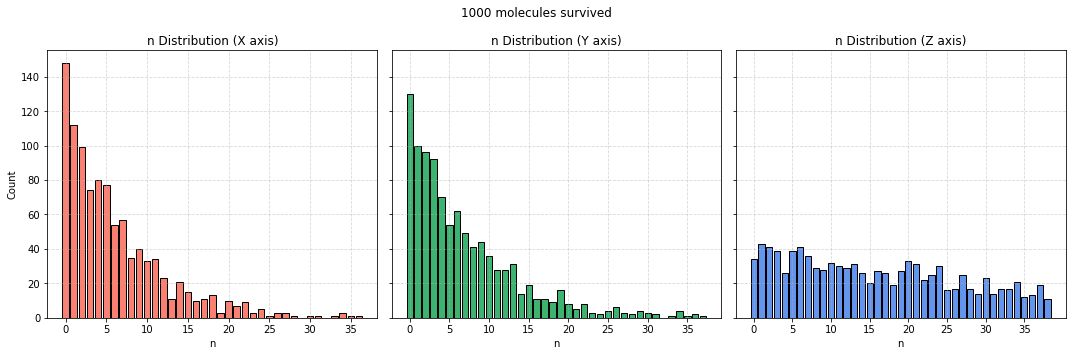

Applying pulses: 100%|██████████| 280/280 [00:26<00:00, 10.64it/s]


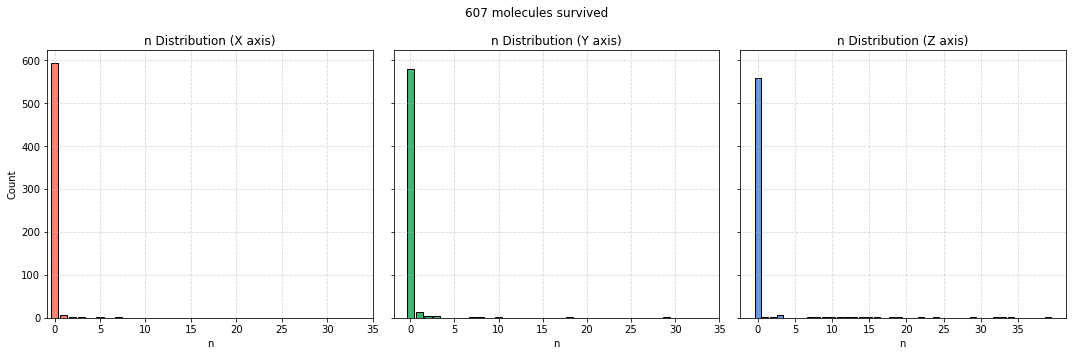

In [36]:
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)
_, _, ground_state_count = RSC_functions.apply_raman_sequence(mol_list, loaded_sequence)
ground_state_counts.append(ground_state_count)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

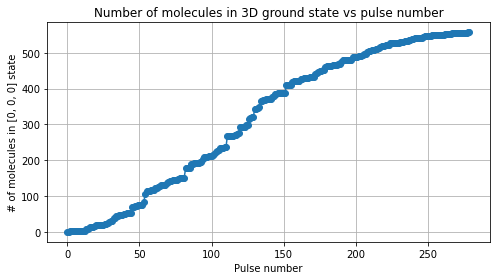

557


In [37]:
plt.figure(figsize=(7, 4))
plt.plot(range(len(ground_state_count)), ground_state_count, marker='o')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.show()
print(ground_state_count[-1])

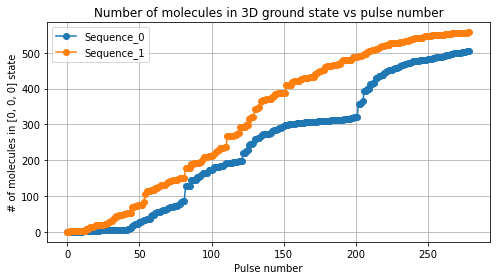

In [38]:
plt.figure(figsize=(7, 4))
for i, count in enumerate(ground_state_counts):
    plt.plot(range(len(count)), count, marker='o', label=f'Sequence_{i}')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Oprimize with score

#### Original

In [12]:
ground_state_counts = []
nums_survive = []
scores = []
n_bars = []

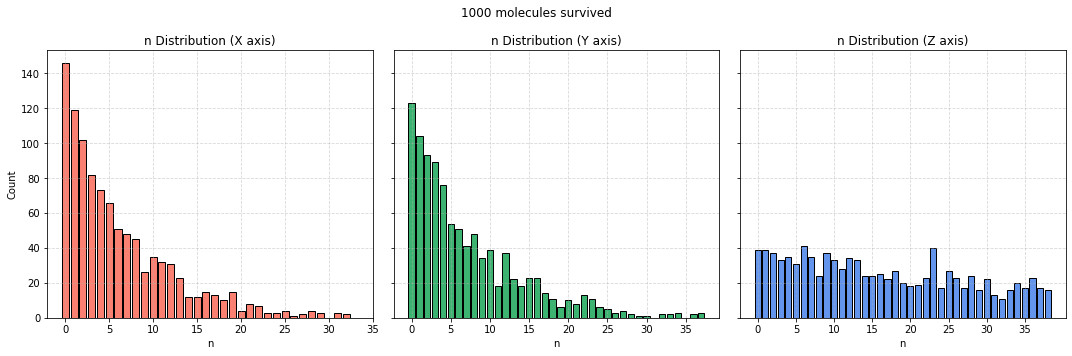

Applying pulses: 100%|██████████| 280/280 [00:26<00:00, 10.54it/s]


In [13]:
sequence = load_best_sequence('sequences/original.txt')
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)
n_bar, num_survive, ground_state_count, score = RSC_functions.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
scores.append(score)
nums_survive.append(num_survive)
n_bars.append(n_bar)

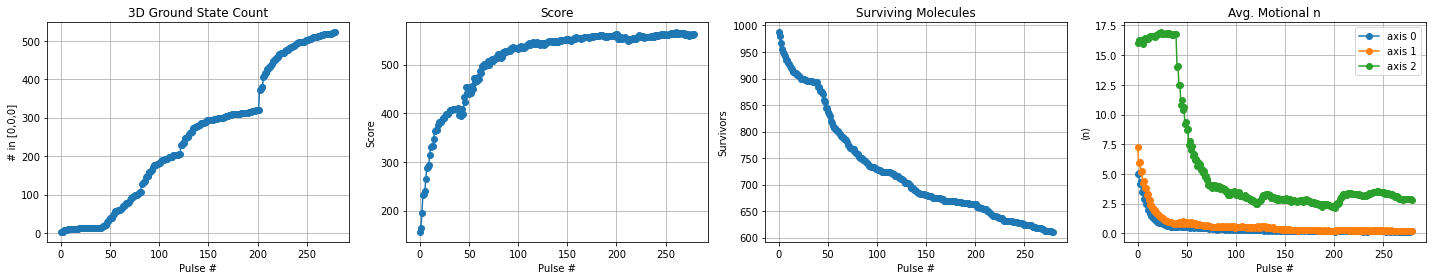

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Score
axs[1].plot(range(len(score)), score, marker='o')
axs[1].set_title("Score")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Score")
axs[1].grid(True)

# Plot 3: Molecules Survived
axs[2].plot(range(len(num_survive)), num_survive, marker='o')
axs[2].set_title("Surviving Molecules")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("Survivors")
axs[2].grid(True)

# Plot 4: Average n per axis
for i in [0, 1, 2]:
    axs[3].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[3].set_title("Avg. Motional n")
axs[3].set_xlabel("Pulse #")
axs[3].set_ylabel("⟨n⟩")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()


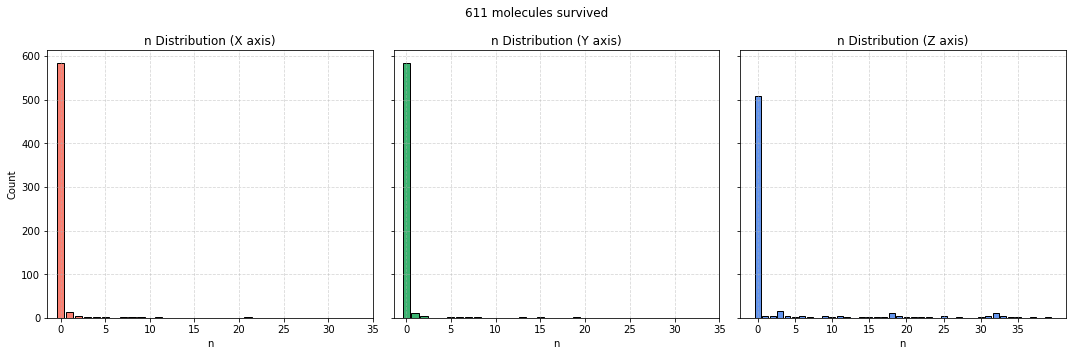

In [15]:
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

#### Optimized

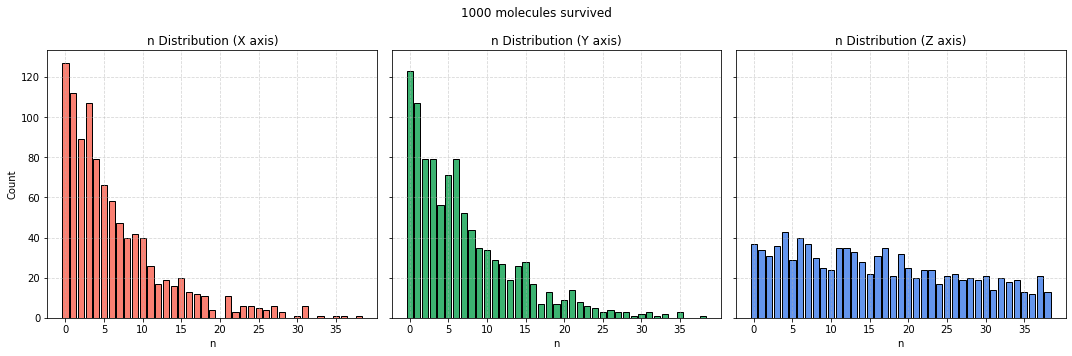

Applying pulses: 100%|██████████| 280/280 [00:24<00:00, 11.42it/s]


In [16]:
sequence = load_best_sequence('sequences/sequence_2025-07-28_12-21-44.txt')
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)
n_bar, num_survive, ground_state_count, score = RSC_functions.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
scores.append(score)
nums_survive.append(num_survive)
n_bars.append(n_bar)

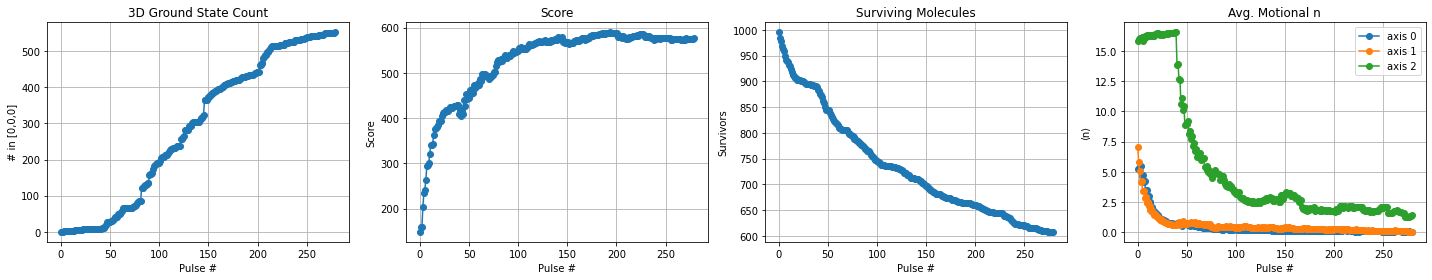

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Score
axs[1].plot(range(len(score)), score, marker='o')
axs[1].set_title("Score")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Score")
axs[1].grid(True)

# Plot 3: Molecules Survived
axs[2].plot(range(len(num_survive)), num_survive, marker='o')
axs[2].set_title("Surviving Molecules")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("Survivors")
axs[2].grid(True)

# Plot 4: Average n per axis
for i in [0, 1, 2]:
    axs[3].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[3].set_title("Avg. Motional n")
axs[3].set_xlabel("Pulse #")
axs[3].set_ylabel("⟨n⟩")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()


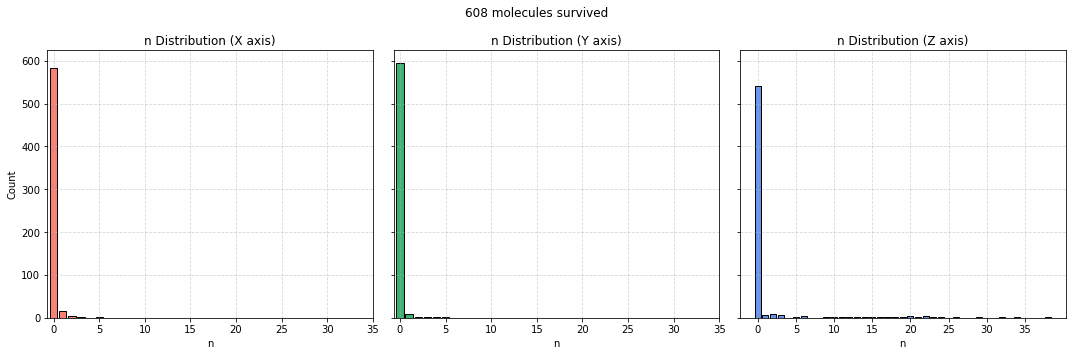

In [18]:
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

### Optimize on the standard error

#### Original

In [4]:
ground_state_counts = []
nums_survive = []
sems = []
n_bars = []

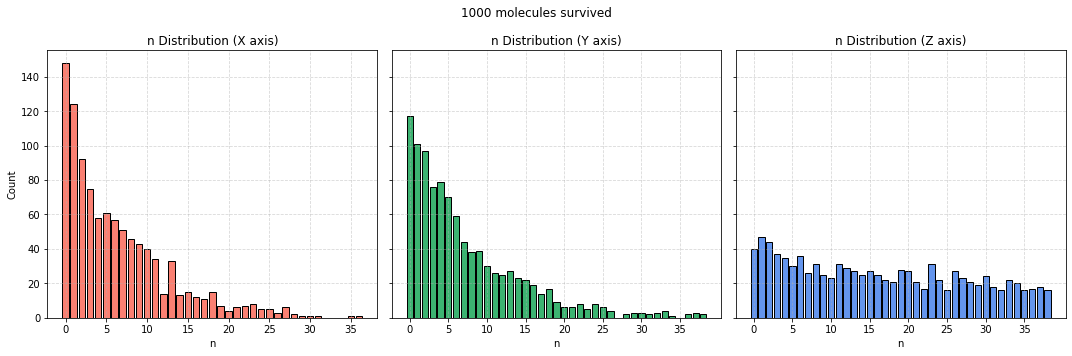

Applying pulses: 100%|██████████| 280/280 [00:23<00:00, 11.79it/s]


In [5]:
sequence = load_best_sequence('sequences/original.txt')
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)
n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
sems.append(sem)
nums_survive.append(num_survive)
n_bars.append(n_bar)

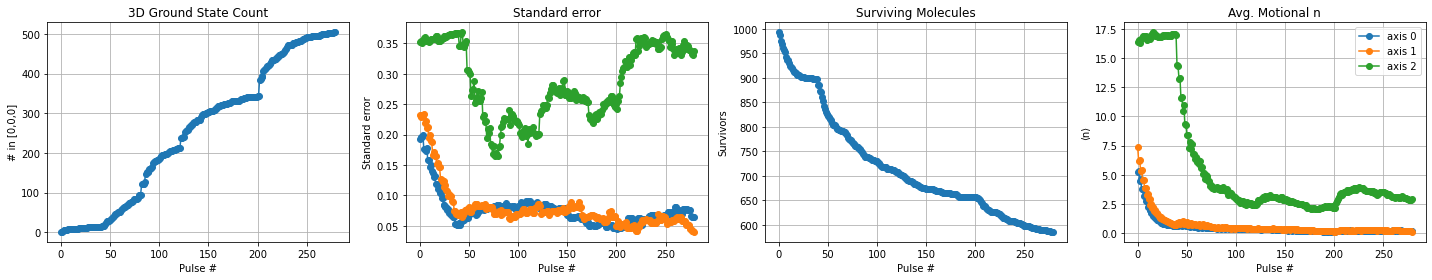

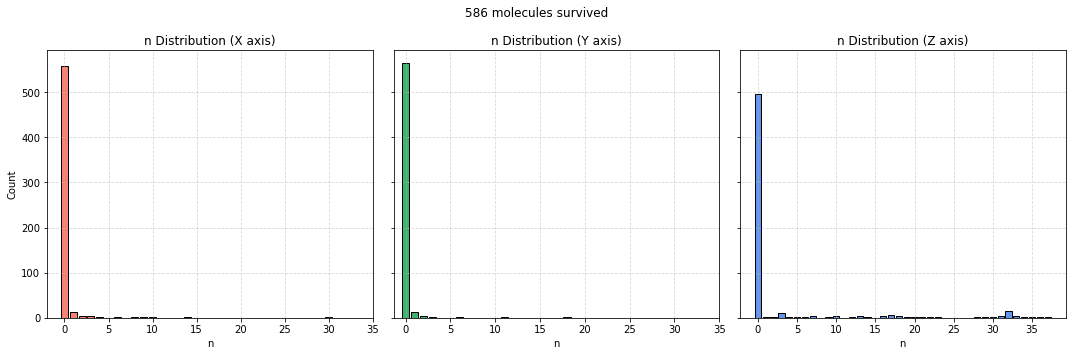

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Standard error
for i in [0, 1, 2]:
    axs[1].plot(range(len(sem)), np.array(sem)[:, i], marker='o', label=f'axis {i}')
axs[1].set_title("Standard error")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Standard error")
axs[1].grid(True)

# Plot 3: Molecules Survived
axs[2].plot(range(len(num_survive)), num_survive, marker='o')
axs[2].set_title("Surviving Molecules")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("Survivors")
axs[2].grid(True)

# Plot 4: Average n per axis
for i in [0, 1, 2]:
    axs[3].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[3].set_title("Avg. Motional n")
axs[3].set_xlabel("Pulse #")
axs[3].set_ylabel("⟨n⟩")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()
_, _, _ = RSC_functions.plot_n_distribution(mol_list)


In [13]:
sequence = load_best_sequence('sequences/sequence_2025-07-28_13-49-41.txt')
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
sems.append(sem)
nums_survive.append(num_survive)
n_bars.append(n_bar)

Applying pulses: 100%|██████████| 280/280 [00:30<00:00,  9.30it/s]


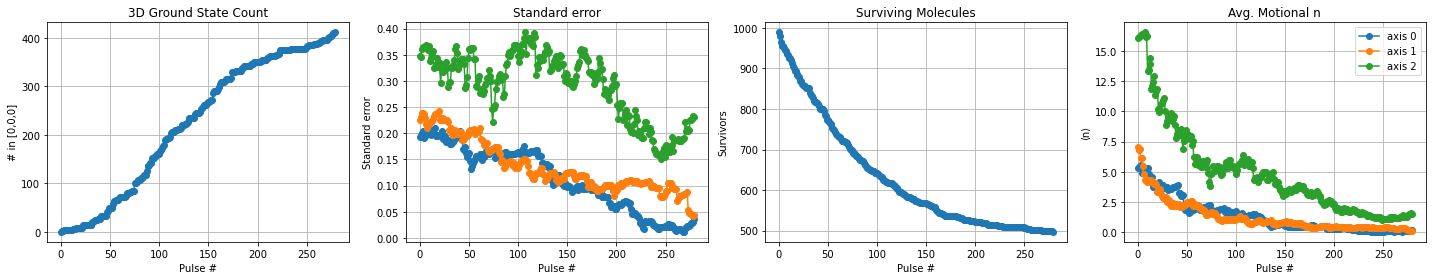

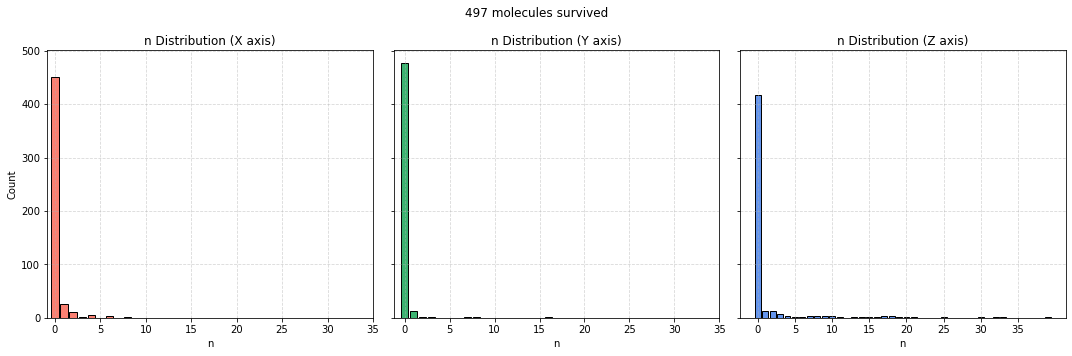

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Standard error
for i in [0, 1, 2]:
    axs[1].plot(range(len(sem)), np.array(sem)[:, i], marker='o', label=f'axis {i}')
axs[1].set_title("Standard error")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Standard error")
axs[1].grid(True)

# Plot 3: Molecules Survived
axs[2].plot(range(len(num_survive)), num_survive, marker='o')
axs[2].set_title("Surviving Molecules")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("Survivors")
axs[2].grid(True)

# Plot 4: Average n per axis
for i in [0, 1, 2]:
    axs[3].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[3].set_title("Avg. Motional n")
axs[3].set_xlabel("Pulse #")
axs[3].set_ylabel("⟨n⟩")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()
_, _, _ = RSC_functions.plot_n_distribution(mol_list)


#### Longer optimization

In [11]:
sequence = load_best_sequence('sequences/sequence_2025-07-28_15-14-05.txt')
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
sems.append(sem)
nums_survive.append(num_survive)
n_bars.append(n_bar)

Applying pulses: 100%|██████████| 280/280 [00:35<00:00,  7.84it/s]


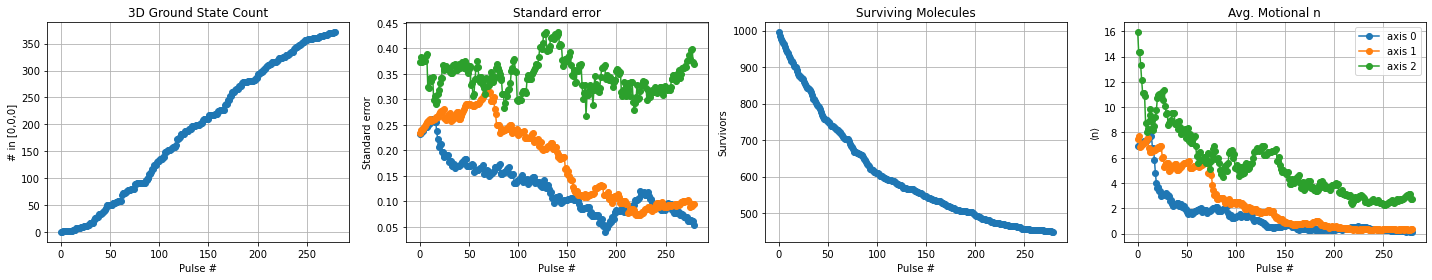

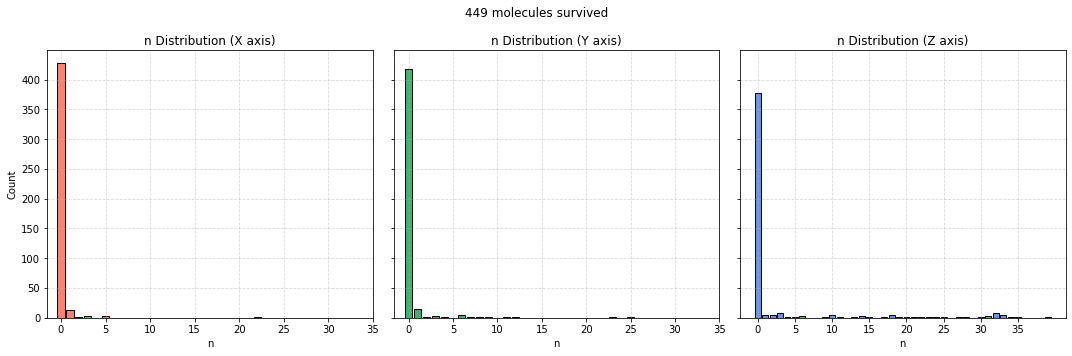

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Standard error
for i in [0, 1, 2]:
    axs[1].plot(range(len(sem)), np.array(sem)[:, i], marker='o', label=f'axis {i}')
axs[1].set_title("Standard error")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Standard error")
axs[1].grid(True)

# Plot 3: Molecules Survived
axs[2].plot(range(len(num_survive)), num_survive, marker='o')
axs[2].set_title("Surviving Molecules")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("Survivors")
axs[2].grid(True)

# Plot 4: Average n per axis
for i in [0, 1, 2]:
    axs[3].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[3].set_title("Avg. Motional n")
axs[3].set_xlabel("Pulse #")
axs[3].set_ylabel("⟨n⟩")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()
_, _, _ = RSC_functions.plot_n_distribution(mol_list)
